In [1]:
import pandas as pd
import numpy as np
import sys
import re
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from matplotlib import style
import seaborn as sns
import math as math
from pylab import rcParams
from scipy import stats
from sklearn.impute import SimpleImputer
from prettytable import PrettyTable
from scipy.stats import zscore 
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics
from sklearn import tree
from sklearn import decomposition, datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold 
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold, train_test_split, cross_val_score
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

In [2]:
df = pd.read_csv('C:/Users/oyeye/Downloads/archive (30)/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
df[df['Time'] == 172792.0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.41465,0.48618,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,0


In [13]:
df.shape

(284807, 31)

<AxesSubplot:>

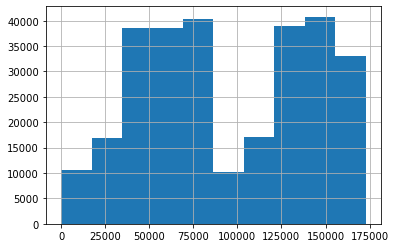

In [13]:
df['Time'].hist()

<AxesSubplot:>

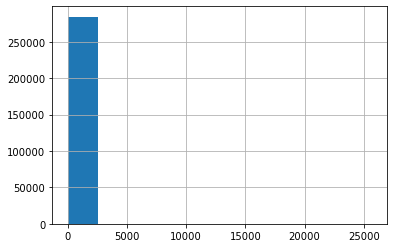

In [37]:
df['Amount'].hist()

In [58]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
new_df = df[(df['Amount'] > lower) & (df['Amount'] < upper)]

In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = df.apply(stats.iqr)

In [50]:
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [51]:
df_clean.shape

(146319, 31)

In [59]:
new_df.shape

(252903, 31)

In [67]:
new_df['Class'].value_counts()

0    252502
1       401
Name: Class, dtype: int64

In [6]:
#######Define features and target variable
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y)

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
lcv = LassoCV()
lcv.fit(X, y)
lcv.score(X, y)
lcv_mask = lcv.coef_ > 0
sum(lcv_mask)

5

In [10]:
rfe_rf = RFE(estimator = RandomForestRegressor(), n_features_to_select = 5, step = 1)
rfe_rf.fit(X, y)
rf_mask = rfe_rf.support_

In [11]:
rfe_gb = RFE(estimator = GradientBoostingRegressor(), n_features_to_select = 5, step = 1)
rfe_gb.fit(X, y)
gb_mask = rfe_gb.support_

In [16]:
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis = 0)
mask = votes >= 1
reduced_X = X[:, mask]
reduced_X.shape

(284807, 10)

In [17]:
X = reduced_X
X.shape

(284807, 10)

In [18]:
sm = SMOTE(random_state=42)

In [19]:
X_res, y_res = sm.fit_resample(X, y)

### Logistic Regression

**************************************************
AUC: 0.982
**************************************************
Accuracy: 0.939
**************************************************
F1 Score: 0.937
**************************************************
Recall Score: 0.900
**************************************************
Precision Score: 0.977


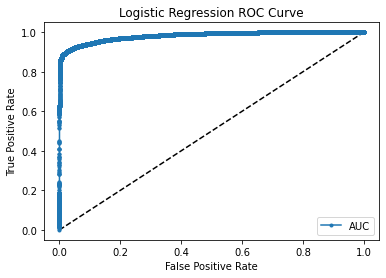

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_res, y_res)
y_predicted = logmodel.predict(X_res)
y_pred_probs = logmodel.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = logmodel.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)

print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)

#score['Logistic Regression'] = [test_auc, test_acc]

# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [21]:
param_grid = {'tol':[0.1, 0.01, 0.001, 0.0001, 0.0002, 0.0003], 'C':[1, 10], 
              'solver':('sag', 'saga', 'lbfgs', 'liblinear'), 'max_iter':[20, 40, 60, 80, 100], 
              'multi_class':['auto', 'ovr', 'multinomial']} 
model = LogisticRegression()
clf = GridSearchCV(model, param_grid, cv = 10, scoring = 'f1', verbose = 3, return_train_score = True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.938, test=0.926), total=   1.7s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.940), total=   1.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.7s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.935, test=0.939), total=   1.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.4s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.938, test=0.924), total=   1.8s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.937, test=0.936), total=   1.4s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.937, test=0.935),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.940), total=   9.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.939), total=   9.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.940), total=   8.9s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.938), total=   8.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.938, test=0.924), total=   8.3s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.937, test=0.936), total=   8.9s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.937, test=0.935), total=   8.7s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=mult

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.937, test=0.926), total=   1.6s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.940), total=   1.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.7s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.940), total=   1.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.1, score=(train=0.937, test=0.925), total=   1.7s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=60, multi_class=auto, sol

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1, score=(train=0.938, test=0.927), total=   1.7s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1, score=(train=0.935, test=0.939), total=   1.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.6s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.4s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.1, score=(train=0.937, test=0.927), total=   1.7s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.940), total=   1.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.1, score=(train=0.937, test=0.939), total=   1.7s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, to

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.938, test=0.925), total=   1.4s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.940), total=   0.9s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.7s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.3s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.938, test=0.924), total=   6.6s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.937, test=0.936), total=   6.2s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.937, test=0.935), total=   6.5s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.937, test=0.937), total=   6.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.936, test=0.938), total=   6.2s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.940), total=   9.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.939), total=   8.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.940), total=   9.3s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.938), total=   9.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.938, test=0.924), total=   7.7s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.937, test=0.936), total=   8.7s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.937, test=0.935), total=   8.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.937, test=0.937), total=   7.8s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.936, test=0.938), total=   8.4s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.938, test=0.926), total=   8.2s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=20, multi

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, to

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.938, test=0.926), total=   1.6s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.4s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.7s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.940), total=   1.4s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.938), total=   1.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.1, score=(train=0.938, test=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, to

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, to

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.1, score=(train=0.938, test=0.925), total=   1.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_it

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, to

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.1, score=(train=0.937, test=0.926), total=   1.8s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.5s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=80, multi_class=

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.1, score=(train=0.937, test=0.926), total=   1.7s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.4s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.1, score=(train=0.936, test=0.939), total=   1.8s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=auto, solver=sag

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lib

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lib

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done 7200 out of 7200 | elapsed: 337.8min finished


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
Best parameters:  {'C': 1, 'max_iter': 40, 'multi_class': 'multinomial', 'solver': 'sag', 'tol': 0.1}
Best score: 0.9354068353452757


In [62]:
score = {}

In [63]:
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1, 3, 5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 0.003}
Best score: 0.984835868498999


In [11]:
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1, 3, 5]]}

model = LogisticRegression(class_weight='balanced')
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 0.1}
Best score: 0.9763534228498226


**************************************************
Train AUC: 0.977
Test AUC: 0.928
**************************************************
Train Accuracy: 0.973
Test Accuracy: 0.973


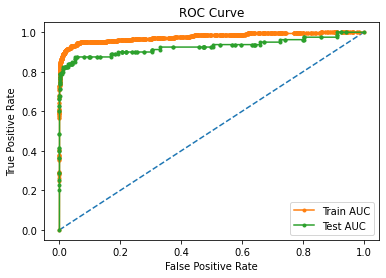

In [64]:
model = LogisticRegression(C = 0.003, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)
y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Random Forest Classifier

**************************************************
AUC: 1.000
**************************************************
Accuracy: 1.000
**************************************************
F1 Score: 1.000
**************************************************
Recall Score: 1.000
**************************************************
Precision Score: 1.000


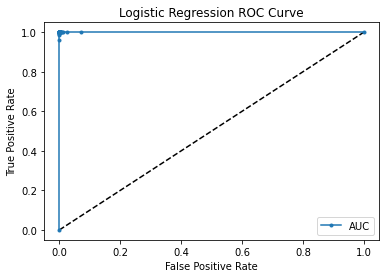

In [22]:
rf = RandomForestClassifier()
rf.fit(X_res, y_res)
y_predicted = rf.predict(X_res)
y_pred_probs = rf.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = rf.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)

#score['Logistic Regression'] = [test_auc, test_acc]

# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [ ]:
param_grid = {'n_estimators':[75, 100, 250, 500, 750, 1000], 'criterion':('gini', 'entropy', 'log_loss'), 
          'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 15, 25, 30], 'min_samples_split':[2, 4, 6, 8, 10]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid, cv = 10, scoring = 'f1', return_train_score = True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

### Support Vector Machine

In [ ]:
svm = SGDClassifier()
svm.fit(X_res, y_res)
y_predicted = svm.predict(X_res)
y_pred_probs = svm.decision_function(X_res)

# Metrics Evaluation
Acc = svm.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [ ]:
param_grid = {'alpha': [10**i for i in range(-4, 5)]}
svm = SGDClassifier()
clf = GridSearchCV(svm, param_grid, cv = 10, scoring='f1', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

### XGBoost Classifier Model

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_res, y_res)
y_predicted = xgb.predict(X_res)
y_pred_probs = xgb.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = xgb.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBOOST ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [ ]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 15, 20, 25, 30], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500]}
xgb = XGBClassifier() 
clf = GridSearchCV(xgb, param_grid, cv = 10, scoring = 'f1', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

### Decision Tree Classifier 

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)
y_predicted = dtc.predict(X_res)
y_pred_probs = dtc.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = dtc.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [ ]:
param_grid = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, param_grid, cv = 10, scoring='f1', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

### Neural Network

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_res, y_res)
y_predicted = mlp.predict(X_res)
y_pred_probs = mlp.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = mlp.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Neural Network ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [ ]:
param_grid = {'hidden_layer_sizes': [(1), (2), (3), (4), (5), (6) , (7), (8)], 
'max_iter':[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
mlp = MLPClassifier()
clf = GridSearchCV(mlp, param_grid, cv = 10, scoring='roc_auc', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

### Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_res, y_res)
y_predicted = gnb.predict(X_res)
y_pred_probs = gnb.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = gnb.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [ ]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GaussianNB()
clf = GridSearchCV(gnb, param_grid, verbose = 1, cv = 10, scoring = 'f1', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))